# Regresión Lineal Simple

El algoritmo de machine learning conocido como *regresión lineal simple (RLS)* consiste en un técnica de aprendizaje automático supervisadp que se utiliza para predecir un número en base a otro. Por ejemplo, el salario en base a los años de experiencia, el resultado de un examen en base a las horas de estudio invertidas, etc.

Para lograr esta capacidad de predicción, primero debemos partir de dos conjuntos de datos para entrenar el modelo de regresión lineal: los datos que se utilizarán como input o entrada, y los que se utilizarán como salida o output. Ambos son los que permitirán al algoritmo encontrar la función lineal que mejor se adecúe a dichos datos para poder predecir otros en el futuro. 

Recordemos que la función lineal tiene esta fórmula:

$y = m.x + b$

Donde:
* $y$: es nuestro número a predecir (siguiendo los ejemplos anteriores, el salario), o sea nuestra variable dependiente.
* $x$: es nuestro número que recibimos como input (ej, los años de experiencia), o sea nuestra variable independiente.
* $m$: nuestra pendiente (pensando en la recta gráfica con la que se puede representar la función lineal).
* $b$: nuestra ordenada al origen o valor que nuestra recta intersecta al eje y (eje de las predicciones).

![Regresión lineal](./img/regresion_lineal3.png)

## Regresión lineal con Python

A la hora de decidir utilizar el algoritmo de regresión lineal simple para entrenar un modelo, debemos asegurarnos que nuestros datos cumplan con una serie de condiciones:

* Exista una relación lineal entre ellos
* Exista una distribución normal
* No multicolinealidad
* No auto-correlación
* Varianzas iguales

En este apartado nos e estudiará a fondo el cumplimiento de estas condiciones porque el objetivo de este notebook es brindar un primer acercamiento a la regresión lineal simple en sí.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [4]:
datos = pd.read_csv("../datos/ingreso.csv")
datos # var indep: horas, va dep a predecir: ingreso

,ingreso,horas
0,9973.577534,40.905476
1,8961.047249,41.576483
2,7437.977263,41.369239
3,12064.915290,41.537211
4,9296.396167,40.441203
...,...,...
995,9998.522402,41.110352
996,6867.097603,40.617061
997,9757.539280,40.798085
998,11044.031510,41.443604


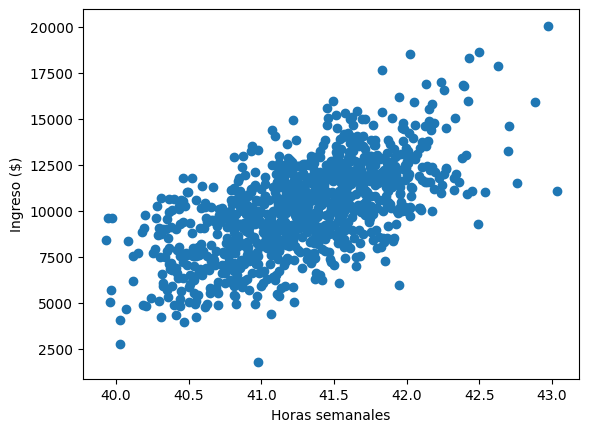

In [6]:
plt.xlabel("Horas semanales")
plt.ylabel("Ingreso ($)")
plt.scatter(datos["horas"], datos["ingreso"])
plt.show()

### Creación del modelo

`LinearRegression` requiere por un lado de la variable (o variables si es regresión lineal móltiple) independiente 
y por el otro de la variable dependiente.
En el caso de la variable independiente, si bien este no es el caso, como puede existir más de una característica (columna) 
que se deba tener en cuenta para dicha variable, se debe pasar este dato como un vector de vectores, o sea como una matriz. 
En este ejemplo en particular, será un vector de vectores con solo un elemento cada uno de ellos.

En `Pandas`, el método `reshape(-1, 1)` se utiliza para cambiar la forma (shape) de una serie o arreglo de una dimensión (como una lista o columna) a dos dimensiones, lo cual es muy útil cuando trabajas con modelos de machine learning de `scikit-learn` u otras librerías que requieren entradas en forma de matrices bidimensionales.

Explicación detallada:
* `-1`: Este argumento le dice a reshape que calcule automáticamente la cantidad de filas necesaria para acomodar todos los elementos, manteniendo la coherencia con las columnas que se van a establecer a continuación. En otras palabras, el -1 permite que el número de filas se ajuste de acuerdo con el tamaño de la serie.

* `1`: Este argumento especifica que debe haber una columna en la nueva forma.

In [14]:
regresion = linear_model.LinearRegression()

horas = datos["horas"].values.reshape((-1,1))

modelo = regresion.fit(horas, datos["ingreso"])

intercept = modelo.intercept_
coef = modelo.coef_

print("Intersección (b):", modelo.intercept_)
print("Pendiente:", modelo.coef_)

Intersección (b): -112320.22713310868
Pendiente: [2965.35614382]


In [17]:
entrada = [[39], [40], [43], [44]]
print(modelo.predict(entrada))
print(entrada * coef + intercept)

[ 3328.6624759   6294.01861972 15190.08705118 18155.443195  ]
[[ 3328.6624759 ]
 [ 6294.01861972]
 [15190.08705118]
 [18155.443195  ]]


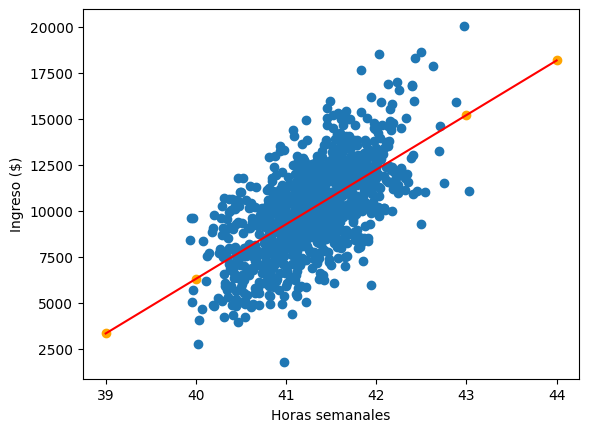

In [19]:
plt.xlabel("Horas semanales")
plt.ylabel("Ingreso ($)")
plt.scatter(datos["horas"], datos["ingreso"])
plt.scatter(entrada, modelo.predict(entrada), color="orange")
plt.plot(entrada, modelo.predict(entrada), color="red")

plt.show()